# Instruction to lab work # 1

> Student name    - Maksym

> Student surname - Maliutin

> Group           - CS-31

> Variant           - 12

# Task description

### Overall work description

The work will contain 2 main parts:
1. In the first part you'll build intuition behind using various regression models using only artificially generated (with noise & outliers) data. I've generated 2 options with `f(x) = A*sin(x) + B` and `f(x) = a*x + b` functions. (you free to add more complex functions (even more dimensional).
2. In the second part you'll solve regression problem on the real data.

Do NOT forget to change your `STUDENT_NO` -- this variable defines random state (it just makes experimental data for every one slighty different).

Do NOT forget to set you contact data in the top cell.


### I. Experiments on artificially generated data:

1. Manually tune linear model by changing `a` and `b` weights of it. Observe position of the line and values of loss function.
2. **More advanced task** (+2 point): modify my code to work with more complex functions as regression models (linear, polynomial, sin, cos, and their combination). Feel free to use as complex function as you could found. Generate some random non-linear data and use your function to manually adjust its weights.
3. Play with default regression methods from `sklearn` library on non-linear data. Search, llm-prompt information on each model to understand how to make the model fit the data without overfitting.


### II. Experiments on real data. (you can keep it in this notebook or in a separate one).

1. Choose any DataSet you like for you experiments (if you've chosen the same, consider that work must differ, otherwise both students will get 0 points for work).
2. Choose the top-3 methods (from `sklearn` library, or you can use other libraries (like `xgboost`) from the previous part.
2. Solve the regression problem in the same manner, as you used for.
    1. Load the data
    2. Do data visualization: correlation, feature distribution, etc.
    3. Do data analysis
    4. Do data correction
    5. Prepare data on usage with ML model: train, validation if necessary, test split; data convertion (to fix distribution or change data type to numeric); remove outliers.
    6. Tune hyperparameters of your model to get the best one.
    7. Train & test the final version of the model. Do conclusion.
3. Your main goal is tune hyperparameters of the chosen models.
4. Examples and template you can find in `ML_basic_course/lab_works/lab2/lab_2_example_plus_task.ipynb`. Or in [my GitHub repo's folder](https://github.com/VolDonets/ML_basics_course/tree/master/lab_works/lab_2)
5. Use that notebook as template, but remember your main goal is to tune hyperparameters of chosen models.

### III. Important.

1. Students, who solved the problem in a single code cell will get 0 points for your work. It's hard to work with your messy code, we have limited time. Use this notebook as your template, create as many cells as you need. Also you can conduct experiments in .py files but in that case prepare normal report.
2. Experiments means you have multiple cells with EXPERIMENTS and your CONCLUSION after that.
3. You can have multiple notebooks if you need, but name it correctly and add `ReadMe.md`.


## Proposition of the real data for experiments

0. Your own data (the main idea here that target value is a number, not a class)
1. [Taxi Price Regression 🚕](https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction)
2. [Car Pricing Regression Dataset](https://www.kaggle.com/datasets/amjadzhour/car-price-prediction)
3. [Second Hand Car Price Prediction
](https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction)
4. [Indian Rental House Price](https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price)
5. *** [Google Stock Prediction](https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction) -- this is stock data, so probably for prediction you'll need the previous values (for previous days, or day).
6. [Forest Fire Regression](https://www.kaggle.com/datasets/nimapourmoradi/forest-fire-regression)
7. [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price)
8. *** [Asteroid Dataset](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset) -- this is hard problem, try to predict any continuous feature (like asteroid radius).
9. [Salary Prediction](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor)
10. [January Flight Delay Prediction](https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction)
11. [Restaurants Revenue Prediction](https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction)
12. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)
13. [Furniture Price Prediction](https://www.kaggle.com/datasets/shawkyelgendy/furniture-price-prediction) 

In [109]:
# --- Базові бібліотеки ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Метрики для оцінки моделей ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Лінійні моделі ---
from sklearn.linear_model import LinearRegression, HuberRegressor, PoissonRegressor

# --- Дерева та ансамблеві моделі ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor, 
    GradientBoostingRegressor, 
    VotingRegressor
)

# --- Метод сусідів ---
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

# --- Підтримуючі вектори ---
from sklearn.svm import SVR


In [110]:
# --- Допоміжні функції ---
def generate_regression_data(
    n_samples=50, 
    n_features=1, 
    mode='linear', 
    noise=2.0, 
    n_outliers=5, 
    random_seed=42, 
    return_coef=False
):
    np.random.seed(random_seed)
    X = np.random.rand(n_samples, n_features) * 10 - 5
    true_intercept, true_weights = 0, np.zeros(n_features)
    
    if mode == 'linear':
        true_intercept = np.random.uniform(-3, 3)
        true_weights = np.random.uniform(-5, 5, size=n_features)
        y_true = np.dot(X, true_weights) + true_intercept
    elif mode == 'nonlinear':
        if n_features < 1:
            raise ValueError("Nonlinear mode requires at least 1 feature.")
        true_intercept = np.random.uniform(-15, 15)
        true_weights = np.random.uniform(-5, 5, size=n_features)
        y_true = true_weights[0] * 20 * np.sin(X[:, 0]*1.5) + true_intercept
        if n_features > 1:
             y_true += np.dot(X[:, 1:], true_weights[1:])
    else:
        raise ValueError("Mode must be 'linear' або 'nonlinear'")

    y = y_true + np.random.normal(scale=noise, size=n_samples)
    if n_outliers > 0:
        outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
        outlier_offset = (np.random.rand(n_outliers) - 0.5) * 30 * (noise + 1)
        y[outlier_indices] += outlier_offset

    if return_coef:
        return X, y, {'weights': true_weights, 'intercept': true_intercept}
    return X, y


def plot_regression_model(X, y, weights=None, intercept=None, title="Regression Model"):
    if X.ndim == 1: X = X.reshape(-1, 1)
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(X, y, c='cornflowerblue', alpha=0.7, edgecolors='k', label='Data')
    if weights is not None and intercept is not None:
        x_line = np.linspace(X.min(), X.max(), 200)
        y_line = x_line * weights[0] + intercept
        ax.plot(x_line, y_line, color='crimson', linewidth=2.0, label="Model")
    ax.set_title(title)
    ax.legend()
    plt.show()



def evaluate_regression_model(y_true, X, model, print_results=True):
    if hasattr(model, 'predict'):
        y_pred = model.predict(X)
    elif isinstance(model, (list, np.ndarray, np.poly1d)):
        poly_model = np.poly1d(model)
        y_pred = poly_model(X[:, 0] if X.ndim > 1 else X)
    else:
        raise TypeError("Unsupported model type")
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }
    if print_results:
        print("----- 📈 Model Evaluation -----")
        print(pd.Series(metrics).to_string(float_format="%.4f"))
        print("-----------------------------")
    return metrics


def plot_sklearn_regression(model, X, y, title="Model Performance", step=0.01):
    """
    Visualizes the performance of a trained scikit-learn regression model.

    If X has one feature, it plots the data and the model's line point-by-point.
    If X has multiple features, it plots the model's predicted vs. actual values.

    :param model: A trained scikit-learn regressor object (e.g., LinearRegression, Ridge).
    :param X: The feature matrix, shape (n_samples, n_features).
    :param y: The true target vector, shape (n_samples,).
    :param title: The title for the plot.
    :param step: The precision delta for drawing the model's line in the 1D case.
    :returns: None. Displays a matplotlib plot.
    """
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    n_features = X.shape[1]

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))

    if n_features == 1:
        ax.scatter(X, y, c='cornflowerblue', alpha=0.6, edgecolors='k', label='Actual Data')

        # --- Updated Section ---
        x_min, x_max = X.min(), X.max()
        padding = (x_max - x_min) * 0.05

        # Create X-records point-by-point using the specified step/precision
        x_line = np.arange(x_min - padding, x_max + padding, step).reshape(-1, 1)

        # Get the corresponding y-values from the model
        y_line = model.predict(x_line)
        # --- End Updated Section ---

        ax.plot(x_line, y_line, color='crimson', linewidth=1.5, label='Model Prediction Line')
        ax.set_xlabel("Feature (X)", fontsize=12)
        ax.set_ylabel("Target (y)", fontsize=12)

    else: # Multi-feature case
        y_pred = model.predict(X)

        ax.scatter(y, y_pred, c='cornflowerblue', alpha=0.6, edgecolors='k')

        perfect_fit_line = np.linspace(min(y.min(), y_pred.min()), max(y.max(), y_pred.max()), 100)
        ax.plot(perfect_fit_line, perfect_fit_line, color='crimson', linestyle='--', linewidth=2, label='Perfect Fit')

        ax.set_xlabel("Actual Values", fontsize=12)
        ax.set_ylabel("Predicted Values", fontsize=12)

    ax.legend(fontsize=11)
    ax.set_title(title, fontsize=14, weight='bold')
    plt.show()

# Section 1: experiments on artificial data

## 1.1. Tuning manual Linear Regression 

----- 📈 Model Evaluation -----
MAE     12.4819
MSE    255.3842
RMSE    15.9807
R2      -1.6188
-----------------------------


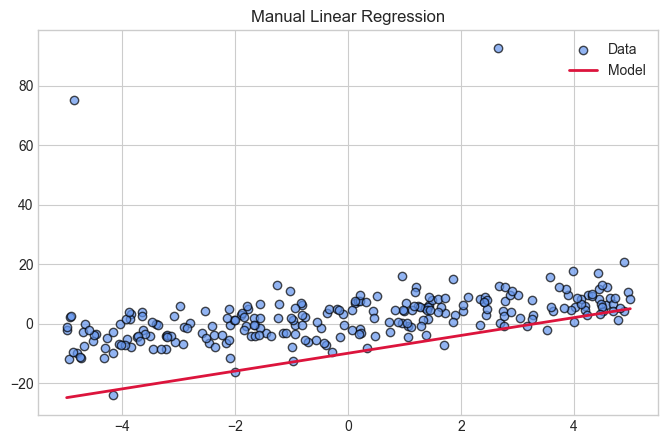

In [111]:
# --- Генерація даних ---
X_lin, y_lin = generate_regression_data(
    n_samples=250, n_features=1, mode='linear',
    noise=5.0, n_outliers=7, random_seed=12
)

lin_model_weights = [3, -10]  # a, b
evaluate_regression_model(y_lin, X_lin, model=lin_model_weights)
plot_regression_model(X_lin, y_lin, weights=[lin_model_weights[0]], intercept=lin_model_weights[1],
                      title="Manual Linear Regression")


## 1.2. Tuning Linear Regression on non-linear data

----- 📈 Model Evaluation -----
MAE      34.0352
MSE    1503.4076
RMSE     38.7738
R2       -0.0397
-----------------------------


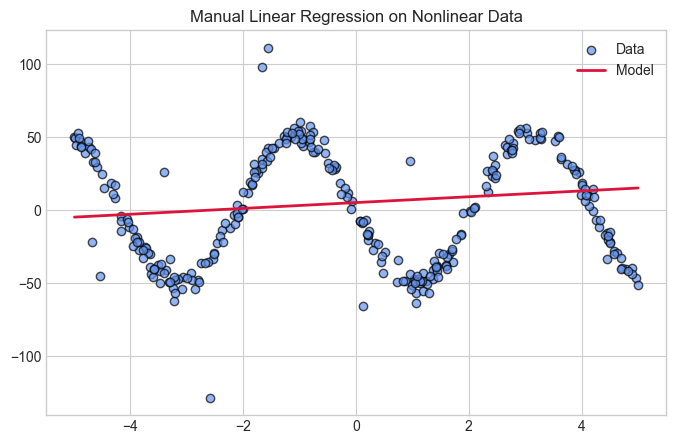

In [112]:
# Тепер на нелінійних даних
X_nonlin, y_nonlin = generate_regression_data(
    n_samples=300, n_features=1, mode='nonlinear',
    noise=5.0, n_outliers=10, random_seed=12
)

lin_model_weights = [2, 5]
evaluate_regression_model(y_nonlin, X_nonlin, model=lin_model_weights)
plot_regression_model(X_nonlin, y_nonlin, weights=[lin_model_weights[0]], intercept=lin_model_weights[1],
                      title="Manual Linear Regression on Nonlinear Data")

### 1.3.1. Playing with `HuberRegressor`

----- 📈 Model Evaluation -----
MAE     4.6482
MSE    81.0852
RMSE    9.0047
R2      0.1685
-----------------------------


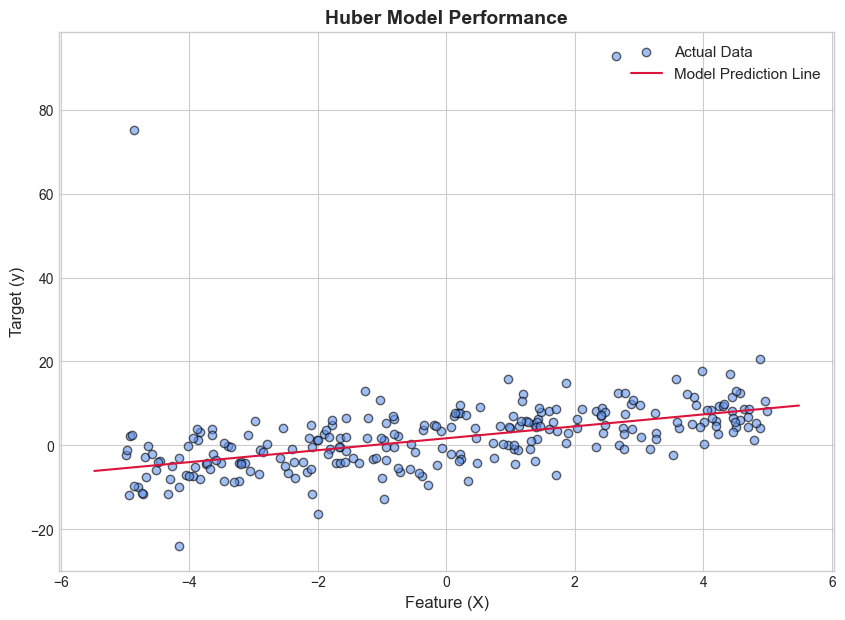

In [113]:
# Huber Regressor
hub_model = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, fit_intercept=True, tol=1e-05)
hub_model.fit(X_lin, y_lin)
evaluate_regression_model(y_lin, X_lin, model=hub_model)
plot_sklearn_regression(hub_model, X_lin, y_lin, title="Huber Model Performance")

### 1.3.2. Playing with `PoissonRegressor`

----- 📈 Model Evaluation -----
MAE     4.6895
MSE    80.5685
RMSE    8.9760
R2      0.1738
-----------------------------


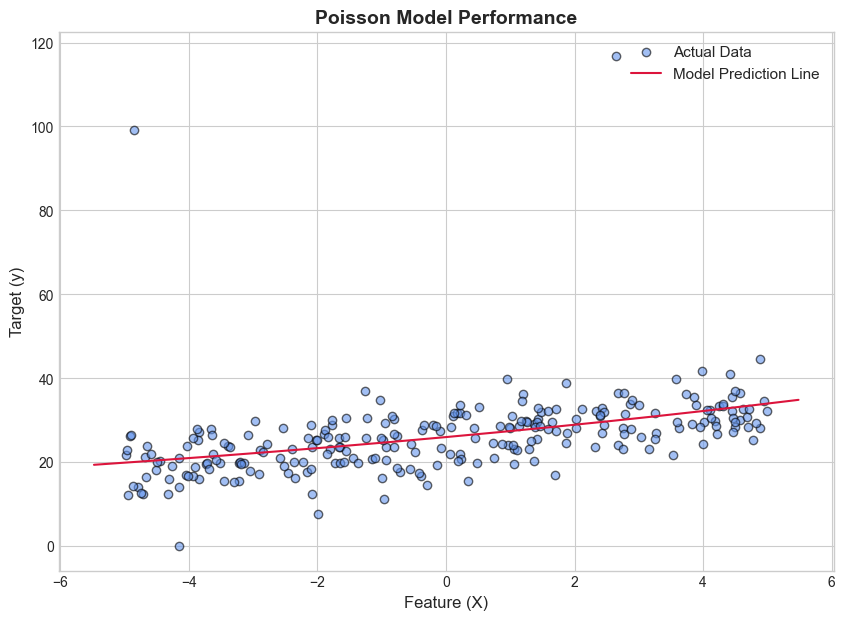

In [114]:
# Poisson Regression(для лінійних даних з невід'ємними значеннями)
pois_model = PoissonRegressor(alpha=1.0, fit_intercept=True, solver="lbfgs", max_iter=100, tol=1e-4)
pois_model.fit(X_lin, y_lin - np.min(y_lin))  # зсув для невід'ємних значень
evaluate_regression_model(y_lin - np.min(y_lin), X_lin, model=pois_model)
plot_sklearn_regression(pois_model, X_lin, y_lin - np.min(y_lin), title="Poisson Model Performance")

## 1.4. Configure non-linear models from sklearn library
### 1.4.1. Playing with KNeighborsRegressor

----- 📈 Model Evaluation -----
MAE      6.3455
MSE    135.1042
RMSE    11.6234
R2       0.9066
-----------------------------


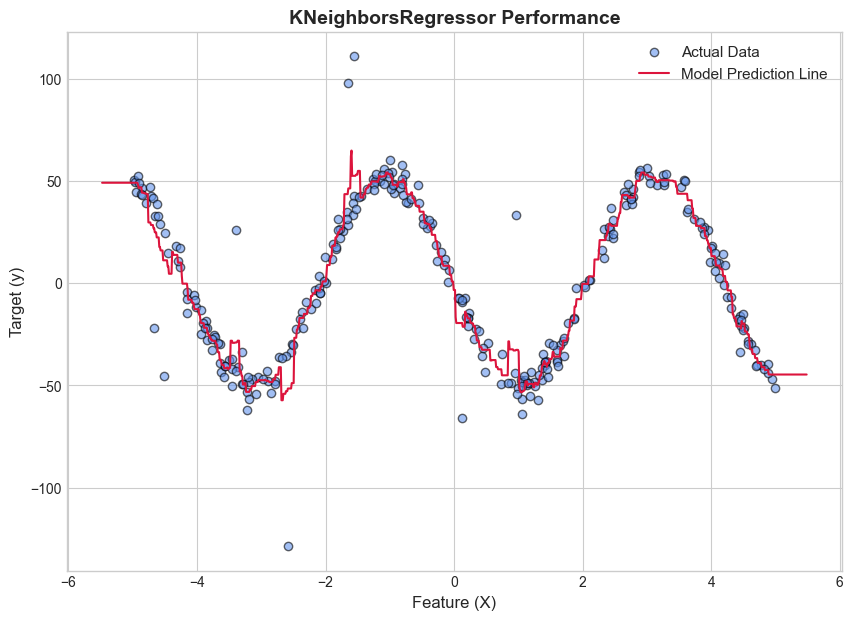

In [115]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights="uniform")
knn_model.fit(X_nonlin, y_nonlin)

evaluate_regression_model(y_nonlin, X_nonlin, model=knn_model)
plot_sklearn_regression(knn_model, X_nonlin, y_nonlin, title="KNeighborsRegressor Performance")


### 1.4.2. Playing with `RadiusNeighborsRegressor`

----- 📈 Model Evaluation -----
MAE    0.0000
MSE    0.0000
RMSE   0.0000
R2     1.0000
-----------------------------


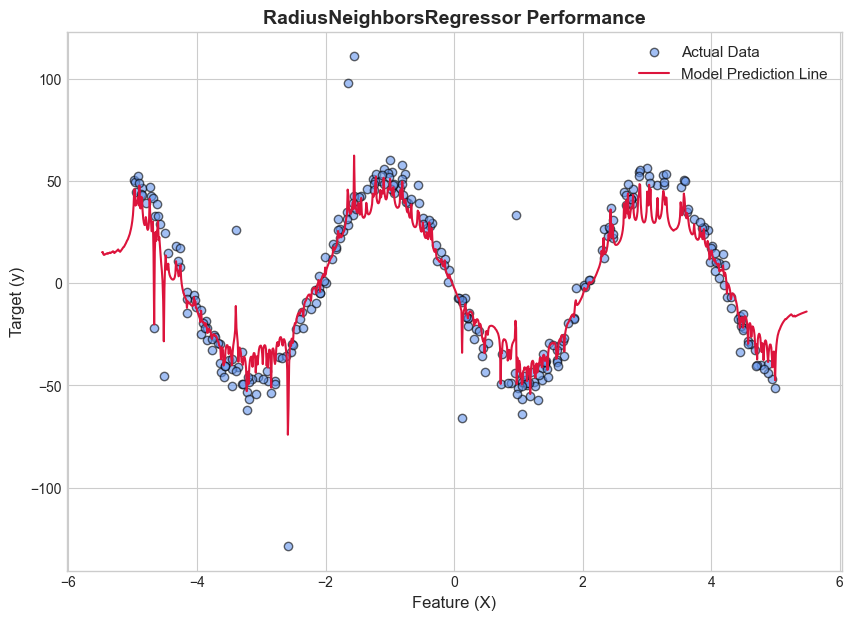

In [116]:
rnn_model = RadiusNeighborsRegressor(
    radius=2.0, 
    weights="distance"
)
rnn_model.fit(X_nonlin, y_nonlin)

evaluate_regression_model(y_nonlin, X_nonlin, model=rnn_model)
plot_sklearn_regression(rnn_model, X_nonlin, y_nonlin, title="RadiusNeighborsRegressor Performance")

### 1.4.3. Playing with `DecisionTreeRegressor`

----- 📈 Model Evaluation -----
MAE    0.0000
MSE    0.0000
RMSE   0.0000
R2     1.0000
-----------------------------


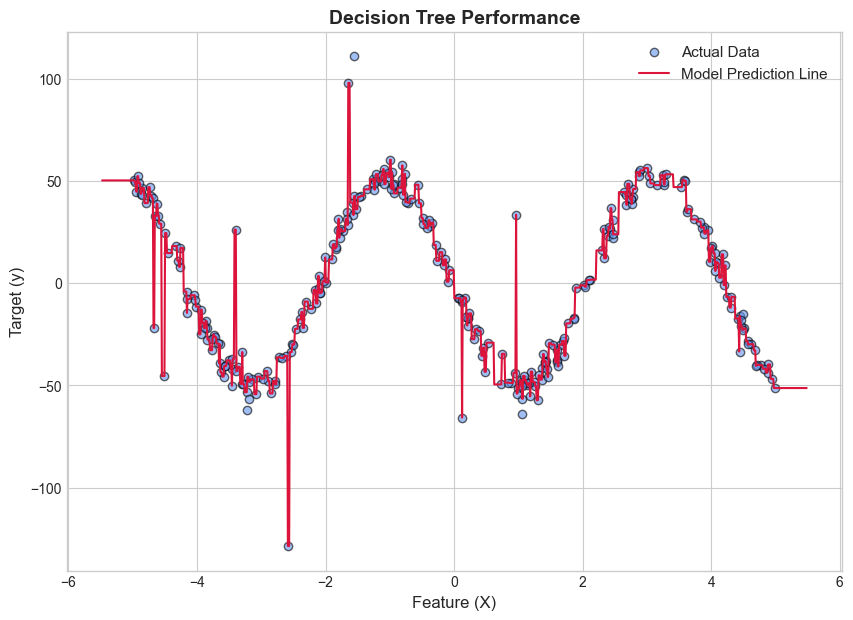

In [117]:
# Decision Tree Regressor(для нелінійних даних)
dt_model = DecisionTreeRegressor(max_depth=None, random_state=12)
dt_model.fit(X_nonlin, y_nonlin)
evaluate_regression_model(y_nonlin, X_nonlin, model=dt_model)
plot_sklearn_regression(dt_model, X_nonlin, y_nonlin, title="Decision Tree Performance")


### 1.4.5. Playing with `RandomForestRegressor`

----- 📈 Model Evaluation -----
MAE     3.3837
MSE    38.2756
RMSE    6.1867
R2      0.9735
-----------------------------


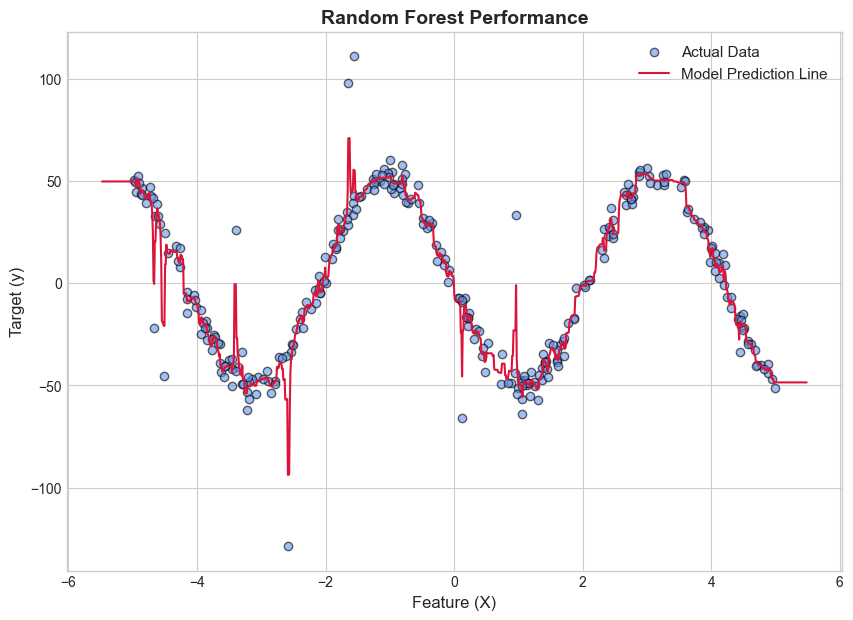

In [118]:
# Random Forest Regressor(для нелінійних даних)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=12)
rf_model.fit(X_nonlin, y_nonlin)
evaluate_regression_model(y_nonlin, X_nonlin, model=rf_model)
plot_sklearn_regression(rf_model, X_nonlin, y_nonlin, title="Random Forest Performance")

### 1.4.6. Playing with `GradientBoostingRegressor`

----- 📈 Model Evaluation -----
MAE     3.7585
MSE    46.4675
RMSE    6.8167
R2      0.9679
-----------------------------


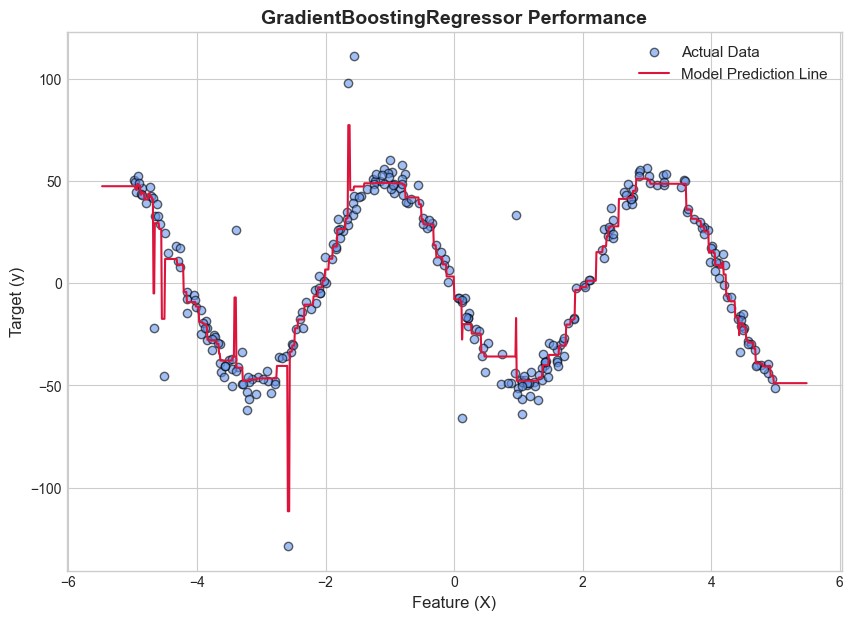

In [119]:
gbr_model = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05,
    max_depth=3,
    random_state=12
)
gbr_model.fit(X_nonlin, y_nonlin)

evaluate_regression_model(y_nonlin, X_nonlin, model=gbr_model)
plot_sklearn_regression(gbr_model, X_nonlin, y_nonlin, title="GradientBoostingRegressor Performance")


### 1.4.7. Playing with `VotingRegressor`

----- 📈 Model Evaluation -----
MAE     4.1783
MSE    65.7850
RMSE    8.1108
R2      0.9545
-----------------------------


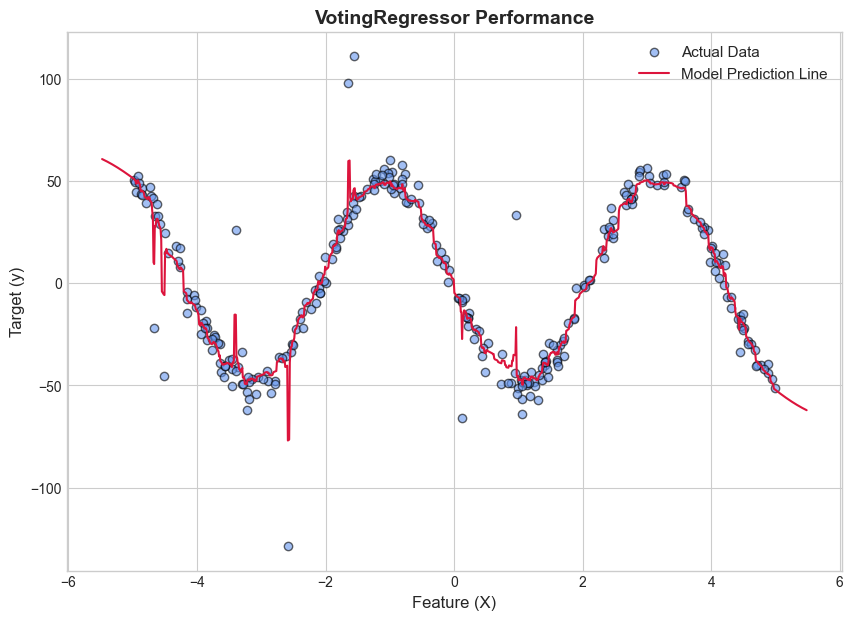

In [120]:
# Комбінуємо кілька моделей разом
voting_model = VotingRegressor(
    estimators=[
        ("rf", RandomForestRegressor(n_estimators=50, random_state=12)),
        ("gbr", GradientBoostingRegressor(n_estimators=100, random_state=12)),
        ("svr", SVR(kernel="rbf", C=50))
    ]
)
voting_model.fit(X_nonlin, y_nonlin)

evaluate_regression_model(y_nonlin, X_nonlin, model=voting_model)
plot_sklearn_regression(voting_model, X_nonlin, y_nonlin, title="VotingRegressor Performance")


### 1.4.8. Playing with `SVR (Support Vector Regression)`

----- 📈 Model Evaluation -----
MAE      6.1980
MSE    171.7143
RMSE    13.1040
R2       0.8813
-----------------------------


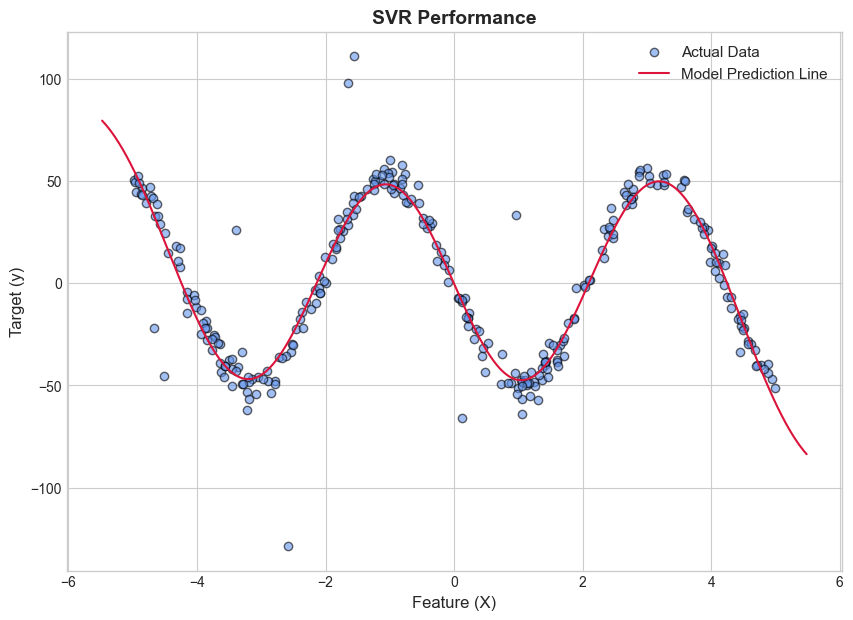

In [121]:
# Support Vector Regressor(SVR)
svr_model = SVR(kernel="rbf", C=100, epsilon=0.1)
svr_model.fit(X_nonlin, y_nonlin)
evaluate_regression_model(y_nonlin, X_nonlin, model=svr_model)
plot_sklearn_regression(svr_model, X_nonlin, y_nonlin, title="SVR Performance")

# Section 2: experiments on real data

### 2.1 Load the Dataset

In [ ]:
# Section 2: Experiments on Real Data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === 2.1. Load & Preprocess Data ===
df = pd.read_csv("./Car_Price_Prediction.csv")

# Drop rows with missing target
df = df.dropna(subset=["Price"])

# Features and target
X = df.drop(columns=["Price"])
y = df["Price"]

# Categorical & numeric features
categorical_features = ["Make", "Model", "Fuel Type", "Transmission"]
numeric_features = ["Year", "Engine Size", "Mileage"]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Data Visualization

#### 2.2 Correlation of Numerical Columns

----- 📈 Model Evaluation -----
MAE       1934.9110
MSE    5640099.7417
RMSE      2374.8894
R2           0.7939
-----------------------------


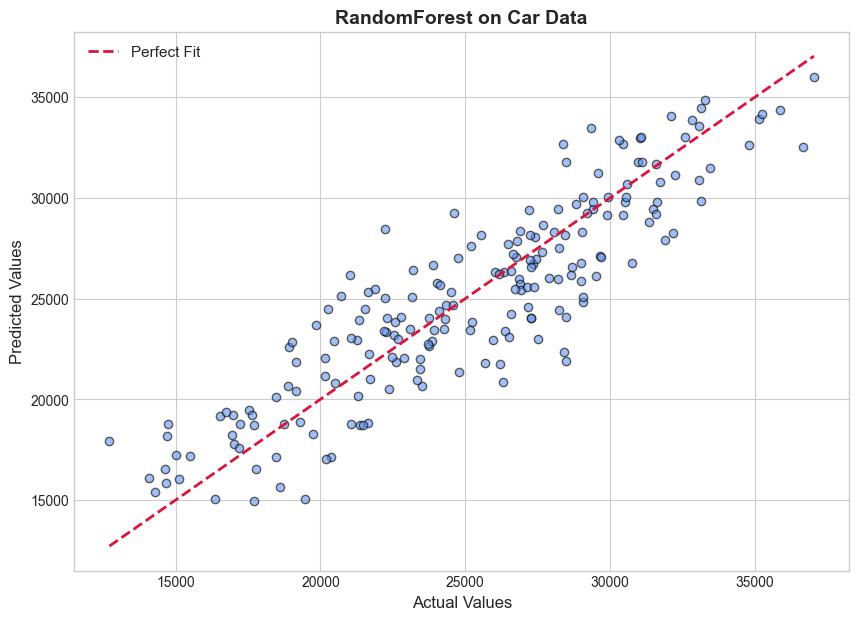

In [132]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=12,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
evaluate_regression_model(y_test, X_test, rf_model)
plot_sklearn_regression(rf_model, X_test, y_test, title="RandomForest on Car Data")

### 2.3 GradientBoostingRegressor

----- 📈 Model Evaluation -----
MAE       2027.7850
MSE    6252260.9923
RMSE      2500.4522
R2           0.7715
-----------------------------


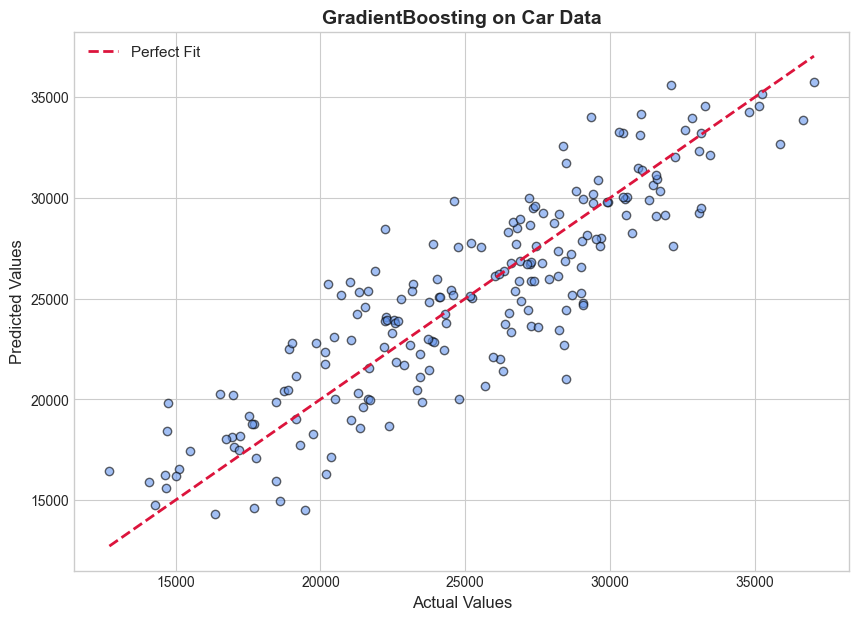

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ))
])

gbr_model.fit(X_train, y_train)
evaluate_regression_model(y_test, X_test, gbr_model)
plot_sklearn_regression(gbr_model, X_test, y_test, title="GradientBoosting on Car Data")

### 2.4 Support Vector Regression (SVR)

----- 📈 Model Evaluation -----
MAE       2459.0286
MSE    8954102.3909
RMSE      2992.3406
R2           0.6728
-----------------------------


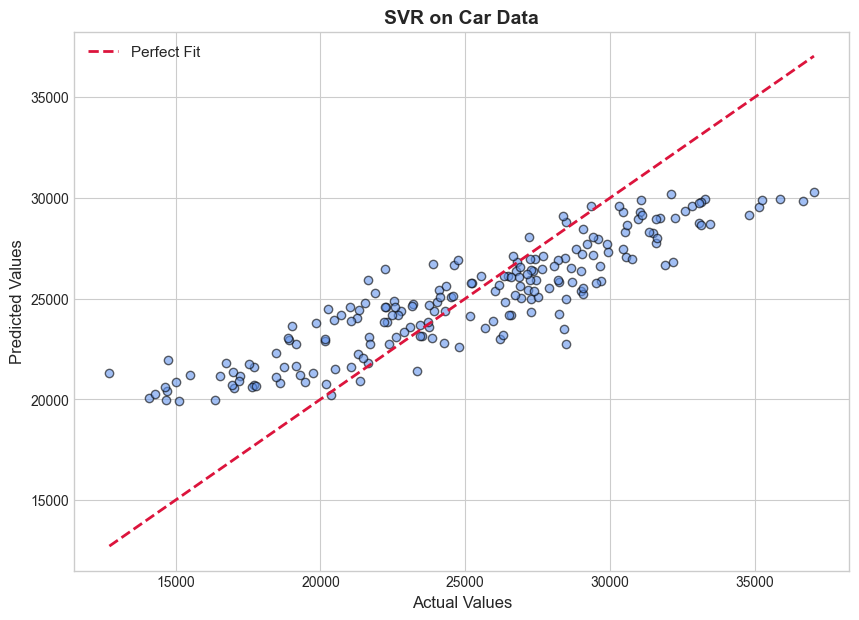

In [134]:
from sklearn.svm import SVR

svr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVR(
        kernel="rbf",
        C=100,
        gamma=0.1,
        epsilon=0.2
    ))
])

svr_model.fit(X_train, y_train)
evaluate_regression_model(y_test, X_test, svr_model)
plot_sklearn_regression(svr_model, X_test, y_test, title="SVR on Car Data")

### 2.5 Compare Results

In [ ]:
models = {
    "RandomForest": rf_model,
    "GradientBoosting": gbr_model,
    "SVR": svr_model
}

results = {}
for name, model in models.items():
    results[name] = evaluate_regression_model(y_test, X_test, model, print_results=False)

results_df = pd.DataFrame(results).T
print("Model Comparison on Car Data")
results_df

Model Comparison on Car Data


,MAE,MSE,RMSE,R2
RandomForest,1934.910983,5.640100e+06,2374.889417,0.793906
GradientBoosting,2027.784994,6.252261e+06,2500.452158,0.771538
SVR,2459.028587,8.954102e+06,2992.340621,0.672810
